# 0. Configure Package Dependencies 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 

import matplotlib.pyplot as plt 
# make the plot outputs appear and be stored within the notebook 
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='deep')

from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/test/test.csv
/kaggle/input/facial-keypoints-detection/training/training.csv


# 1. Import the Dataset

In [2]:
# Read the ".csv" from input folder.
train = pd.read_csv("../input/facial-keypoints-detection/training/training.csv")
test = pd.read_csv("../input/facial-keypoints-detection/test/test.csv")
lookuptab = pd.read_csv("../input/facial-keypoints-detection/IdLookupTable.csv")

# 2. Preview the Dataset

## 2.1 Training data preview 
- 7049 images 
- 31 features 
    - The last column "Image" is a string including 9216=96*96 pixels. 

In [3]:
# Display the dimensions of the dataset.
rows = train.shape[0]
columns = train.shape[1]
print('Total Number of Features: ', columns)
print('Total Number of Instances: ', rows)

Total Number of Features:  31
Total Number of Instances:  7049


In [4]:
# Preview the first 5 instances.
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
# Display the dimensions and data type of the train data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [6]:
# Return the statistics for all numeric variables.
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## 2.2 Testing data preview 

- 1783 test images
- 2 columns 
    - ImageId
    - Image a string including 9216=96*96 pixels

In [7]:
# Display the dimensions of the dataset.
rows = test.shape[0]
columns = test.shape[1]
print('Total Number of Features: ', columns)
print('Total Number of Instances: ', rows)

Total Number of Features:  2
Total Number of Instances:  1783


In [8]:
# Preview the first 5 instances.
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [9]:
# Display the dimensions and data type of the train data.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


## 2.3 lookuptab data preview
- 27124 instances for different imageID
- 4 columns
    - RowId
    - ImageId
    - FeatureName 
    - **Location** -- predicting value

In [10]:
# Display the dimensions of the dataset.
rows = lookuptab.shape[0]
columns = lookuptab.shape[1]
print('Total Number of Features: ', columns)
print('Total Number of Instances: ', rows)

Total Number of Features:  4
Total Number of Instances:  27124


In [11]:
# Preview the first 5 instances.
lookuptab.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [12]:
# Display the dimensions and data type of the train data.
lookuptab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


# 3. Feature Engineering

## 3.1 Process null and missing values 
- 28 missing columns 
- drop all rows that having missing values 
- 2140 images as training data after dropping missing value

In [13]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [14]:
# Whether each column contains at least one True element
train.isna().any()

left_eye_center_x             True
left_eye_center_y             True
right_eye_center_x            True
right_eye_center_y            True
left_eye_inner_corner_x       True
left_eye_inner_corner_y       True
left_eye_outer_corner_x       True
left_eye_outer_corner_y       True
right_eye_inner_corner_x      True
right_eye_inner_corner_y      True
right_eye_outer_corner_x      True
right_eye_outer_corner_y      True
left_eyebrow_inner_end_x      True
left_eyebrow_inner_end_y      True
left_eyebrow_outer_end_x      True
left_eyebrow_outer_end_y      True
right_eyebrow_inner_end_x     True
right_eyebrow_inner_end_y     True
right_eyebrow_outer_end_x     True
right_eyebrow_outer_end_y     True
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x           True
mouth_left_corner_y           True
mouth_right_corner_x          True
mouth_right_corner_y          True
mouth_center_top_lip_x        True
mouth_center_top_lip_y        True
mouth_center_bottom_

In [15]:
# Drop all rows which contain missing values.
train.dropna(inplace=True)
train.isna().any().value_counts()

False    31
dtype: int64

In [16]:
train.shape # print current shape

(2140, 31)

## 3.2 Split training data into X and Y

In [17]:
# Convert string into numpy array (length=9216).
train['Image'] = train['Image'].apply(lambda img: np.fromstring(img, sep=' '))

# 'Image' feature should be X and other features should be y.
# That is, we use 7049 images to predict location of 15 keypoints.
train_X = np.vstack(train['Image'].values)  # Stack arrays in sequence vertically (row wise)
train_Y = train.drop(labels=['Image'],axis=1) # Drop the last column and keep 15 keypoints as descriptive features

del train  # Free train space 

## 3.3 Normalization

In [18]:
# Calculate max and min value of "train_Y".
print("max = ", train_Y.max().max())
print("min = ", train_Y.min().min())

max =  95.80898312149999
min =  3.82624305628


In [19]:
# Normalize X and Y into [0,1] or [-1,1].
train_X = train_X / 255.0   # Convert [0,255] into [0,1], float type
train_Y = (train_Y-48.0) / 48.0  # Convert [3,96] into [-1,1], float type

## 3.4 Reshape

In [20]:
# Reshape image in 3 dimensions (height = 96px, width = 96px, canal = 1).
# numpy.ndarray.reshape: Returns an array containing the same data with a new shape.
train_X = train_X.reshape(-1,96,96,1) # row is unknown, column is 96*96*1

In [21]:
print(train_X.shape)
print(train_Y.shape)

(2140, 96, 96, 1)
(2140, 30)


## 3.5 Split training and valdiation set (NOT NECESSARY)

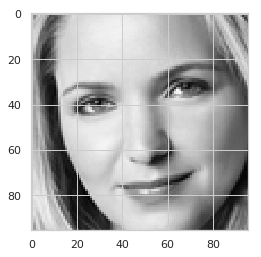

In [22]:
# Set the random seed.
random_seed = 42 

# Split the train and the validation set for the fitting.
X_train, X_val, Y_train, Y_val = train_test_split(train_X, train_Y, test_size = 0.1, random_state=random_seed) 

# Display an image in gray.
g = plt.imshow(X_train[0][:,:,0],cmap='gray')

# 4. Define the model

## 4.1 Set model structure

In [23]:
# Set the CNN model. 
# CNN architechture is In -> [Conv2D->relu -> MaxPool2D -> Dropout -> Normalization]*4 -> Flatten -> [Dense -> Dropout]*2 -> Out

model = Sequential()  # Keras Sequential model

model.add(Conv2D(filters=16, kernel_size=(2,2), padding='same', activation='relu', input_shape=(96,96,1)))  # add 2D convolution layer 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))  # add pooling layer 
model.add(Dropout(0.2))  # apply dropout to the input
model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch

model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) 
model.add(Dropout(0.2))
model.add(BatchNormalization()) 

model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization()) 

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization()) 

model.add(Flatten())  # Flattens the input. Does not affect the batch size.

model.add(Dense(512, activation="relu"))  # Just your regular densely-connected NN layer
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))  # Just your regular densely-connected NN layer
model.add(Dropout(0.2))
model.add(Dense(30, activation="softmax")) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
__________

## 4.2 Set optimizer, loss function and metric

In [24]:
# Define the optimizer.
optimizer = optimizers.Adam()

In [25]:
# Before training a model, you need to configure the learning process, which is done via the compile method. 
# Compile the model.
model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])

## 4.3 Set anneale

In [26]:
# Set a learning rate annealer. 
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, verbose=1, min_lr=0.00001) 

In [27]:
# Set parameters for batching.
epochs = 200
batch_size = 128

In [28]:
history = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, callbacks=[reduce_lr], validation_split=0.2, verbose=2)
# history = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

Train on 1712 samples, validate on 428 samples
Epoch 1/200
 - 5s - loss: 0.1302 - mean_absolute_error: 0.3135 - acc: 0.4410 - val_loss: 0.1299 - val_mean_absolute_error: 0.3108 - val_acc: 0.2780
Epoch 2/200
 - 0s - loss: 0.1233 - mean_absolute_error: 0.3067 - acc: 0.4813 - val_loss: 0.1292 - val_mean_absolute_error: 0.3111 - val_acc: 0.4322
Epoch 3/200
 - 0s - loss: 0.1208 - mean_absolute_error: 0.3055 - acc: 0.4982 - val_loss: 0.1263 - val_mean_absolute_error: 0.3103 - val_acc: 0.4346
Epoch 4/200
 - 0s - loss: 0.1197 - mean_absolute_error: 0.3052 - acc: 0.5380 - val_loss: 0.1259 - val_mean_absolute_error: 0.3103 - val_acc: 0.4322
Epoch 5/200
 - 0s - loss: 0.1191 - mean_absolute_error: 0.3051 - acc: 0.5514 - val_loss: 0.1262 - val_mean_absolute_error: 0.3103 - val_acc: 0.4322
Epoch 6/200
 - 0s - loss: 0.1187 - mean_absolute_error: 0.3051 - acc: 0.6244 - val_loss: 0.1249 - val_mean_absolute_error: 0.3102 - val_acc: 0.4322

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00050

## 4.4 Data augmentation (Not yet realized)

In [29]:
# # Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


In [30]:
# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train) 

# # Trains the model on data generated batch-by-batch by a Python generator (or an instance of Sequence). 
# # fits the model on batches with real-time data augmentation:
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
#                               epochs=epochs, 
#                               validation_data=(X_val,Y_val), 
#                               verbose=2, 
#                               steps_per_epoch=X_train.shape[0], 
#                               callbacks=[reduce_lr]
#                              )

# 5. Evaluate the model

## 5.1 Training and validation curves

In [31]:
def plot_loss(hist,name,plt,RMSE_TF=False):
    '''
    RMSE_TF: if True, then RMSE is plotted with original scale 
    '''
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="Training")
    plt.plot(val_loss,linewidth=3,label="Validation")

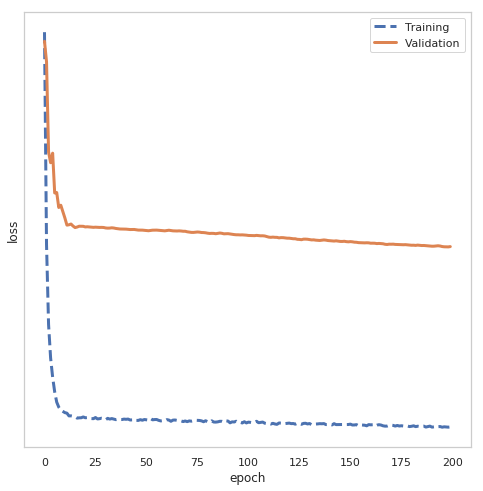

In [32]:
# Draw loss value trend towards.
plt.figure(figsize=(8,8))
plot_loss(history.history,"model",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 6. Predict and submit "submission.csv" file

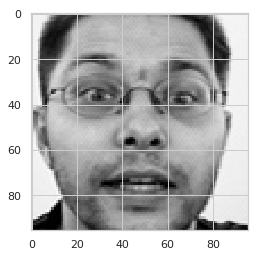

In [33]:
# Prepare testing data.
test['Image'] = test['Image'].apply(lambda img: np.fromstring(img, sep=' ')) 
test_X = np.vstack(test['Image'].values)  # Stack arrays in sequence vertically (row wise)
test_X = test_X / 255.0   # Convert [0,255] into [0,1], float type

# Reshape image in 3 dimensions (height = 96px, width = 96px, canal = 1).
test_X = test_X.reshape(-1,96,96,1)

# Display an image in gray.
g = plt.imshow(test_X[0][:,:,0],cmap='gray')

In [34]:
# Predict results with out CNN model.
results = model.predict(test_X) # results is numpy.ndarray type

In [35]:
# Predict 15*2 keypoints for each image (total 1783 images).
results.shape

(1783, 30)

In [36]:
results[0]

array([1.8594124e-04, 4.2385981e-08, 6.5489274e-07, 1.3426734e-07,
       5.5184853e-07, 7.2958748e-08, 1.1199280e-01, 4.9279549e-09,
       1.3225449e-08, 1.1282036e-07, 3.0534723e-06, 1.3314396e-07,
       7.3875559e-09, 9.1027601e-08, 2.4452311e-01, 5.2650094e-08,
       4.9175821e-08, 9.9454105e-08, 4.2808956e-08, 2.1506857e-08,
       2.4446476e-07, 6.4176123e-07, 4.0511411e-05, 1.6635112e-01,
       3.3944470e-08, 1.2936561e-01, 1.4204866e-08, 2.4371270e-02,
       4.3854161e-08, 3.2316354e-01], dtype=float32)

In [37]:
lookid_list = list(lookuptab['FeatureName'])
imageID = list(lookuptab['ImageId']-1)
pre_list = list(results)
rowid = list(lookuptab['RowId'])

feature = []
for f in list(lookuptab['FeatureName']):
    feature.append(lookid_list.index(f))
    
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y]*48+48)

In [38]:
rowid = pd.Series(rowid,name='RowId')
imageid = pd.Series(list(lookuptab['ImageId']),name='ImageId')
featid = pd.Series(lookid_list,name='FeatureName')                    
loc = pd.Series(preded,name='Location')

In [39]:
# submission = pd.concat([rowid,imageid,featid,loc],axis = 1)
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv("cnn_keras_facial.csv",index=False)

In [40]:
submission.head()

,RowId,Location
0,1,48.008925
1,2,48.000002
2,3,48.000031
3,4,48.000006
4,5,48.000026


In [41]:
# Build row and column indices for result dataframe.
# res_list = list(results)
# feat_list = list(lookuptab['FeatureName'])
# feature_dict = {}

    
# for index, row in lookuptab.iterrows():
#     row['Location'] = res_list[row['ImageId']-1][]
